# Computer Vision
When we think about image analysis and manipulation we usually think about paid software like photoshop which does have an intuitive user interface and does allow for the manual manipulation of images. However, this procedure can be done in Python albeit with the loss of a user interphase. We will generally prefer this whenever we have a large amount of images we wish to analyze since doing the analysis by hand on every image will end up being very time consuming; thus, in applications of computer vision and image labeling a programming language is used to manipulate and analyze the image.

## How do computers see an image?
For us, looking at an image is relatively simple (due to our evolved eyesight and seemingly automatic analysis we do with our brain) yet once again we reach the point in which we must remember that computers and people speak different languages. We usually do the analysis in terms of the elements of art (line, shape, texture, brightness, form, space and color); however, computers aren't aware of said elements and their different values. As such; we need to find a way to translate these elements we use naturally into such a way that a computer is able to understand them, to do so we need to see how an image is stored.

We begin by loading the image bird.png using matplotlib and inspecting the data type.

In [1]:
# First step is to always import your packages.
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Load the image using the imread command.
filename = 'img/bird.png'    # need to give the file name of course
grey_img = plt.imread(filename, format='.png')  

# Notice that it is a numpy array.
print(type(grey_img))
# It's not a square because the dimensions are the not the same
print(grey_img.shape)


<class 'numpy.ndarray'>
(637, 991)


So it's a numpy array; even though we know the object is an image the way it's stored is via a numpy nd array (the nd stands for n dimensions). Since now we know it's an array we can start to explore it and find out more about it; for example, two interesting properties of an array are its shape and number of dimensions since those 2 have a huge impact on the time the computer needs in order to parse through the image.

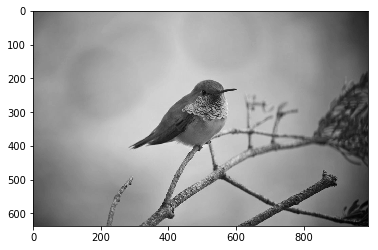

In [3]:
# We choose to display it as a grayscale map since the image is gray.
plt.imshow(grey_img,
           cmap='gray')  # If you don't set the colormap, will do something funky!
plt.show()

If we check the properties of the image using file explorer we see that the dimensions of the image are 637x991 pixels; thus, we see that the array is a 2D array where the dimensions correspond to the size of the image. Now we need to find out what the values inside the cells correspond to; to find this out we'll extract a section of the image, plot it, and print the array.

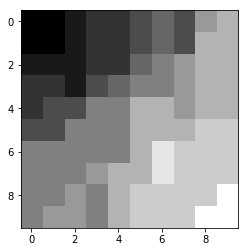

[[87 87 88 89 89 90 91 90 93 94]
 [87 87 88 89 89 90 91 90 94 94]
 [88 88 88 89 89 91 92 93 94 94]
 [89 89 88 90 91 92 92 93 94 94]
 [89 90 90 92 92 94 94 93 94 94]
 [90 90 92 92 92 94 94 94 95 95]
 [92 92 92 92 92 94 96 95 95 95]
 [92 92 92 93 94 94 96 95 95 95]
 [92 92 93 92 94 95 95 95 95 97]
 [92 93 93 92 94 95 95 95 97 97]]


In [4]:
# What portion of the image is this? Can you figure it out? 
plt.imshow(grey_img[0:10,0:10],
           cmap='gray')
plt.show()

print(grey_img[0:10,0:10])

The value of the cells will determine the brightness seen in the image; in the case of a grayscale image a value of 0 corresponds to the color black whilst a value of 255 corresponds to the color white. This means that we now have a quantifiable way to filter the image based on its brightness by using its cell value; this does work really well for grayscale images, but most of the images we see on a day to day basis are colored images. How does color change the structure of the image?

<class 'numpy.ndarray'>


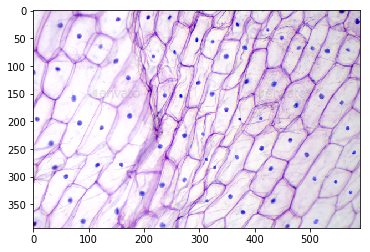

In [5]:
# Good point for an exercise: try to load the image "img/Onion.jpg" and then display it...
filename = 'img/Onion.jpg'
color_img = plt.imread(filename)
print(type(color_img))

# Now we don't use a colormap since matplotlib shows color images by default.
plt.imshow(color_img)
plt.show()

In [6]:
# The class remains unchanged; but what about the dimensions?
print(color_img.shape)
# Notice that it has 3 dimensions, rows, columns and "channels". What are channels? Read below. 

(393, 590, 3)


As we can see; there is a new dimension on the numpy array of length 3. While the first two correspond to the size of the image; the last dimension contributes color to the image. Matplotlib by default loads the images using the RGB format; this format is a color scheme in which distinct weights of red, green and blue are combined in order to generate a wide array of colors. Therefore; we can image this new array as 3 superimposed images in red, green and blue where each combination of said values produce a different color.

![Array](img\3DDD.jpg)

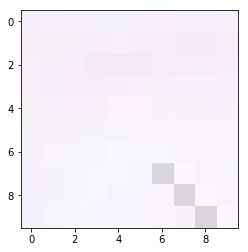

[[[245 237 248]
  [246 238 249]
  [246 240 250]
  [244 241 250]
  [244 241 250]]

 [[245 238 246]
  [245 238 246]
  [245 238 246]
  [245 237 248]
  [248 238 249]]

 [[245 240 247]
  [244 239 246]
  [245 237 248]
  [245 233 245]
  [245 231 244]]

 [[246 239 247]
  [245 237 248]
  [246 236 247]
  [247 235 247]
  [248 236 248]]

 [[246 239 246]
  [246 239 247]
  [246 239 247]
  [247 240 248]
  [250 243 250]]]


In [7]:
# Let's display a chunk of this image. 
plt.imshow(color_img[0:10,0:10,:])
plt.show()

# And look at the values.
# Notice that slight differences in color can change the rgb values significally.
print(color_img[0:5,0:5,:])

Since we now have 3 distinct values in every pixel of the image; this increses the number of possible values in each pixel dramatically (255 to the third power). This increased number of possible values can make analysis of 3 channel images a challenge; however, in the next section we'll show you a tool that will help you in image analysis.

## Color histograms
Color histograms are (as the name implies); histograms that show the distribution of pixel values for both grayscale images and from each channel. We have used a histogram previously in order to see the frequency of numbers in 1 dimensional arrays; however, we can transform a two dimensional array into a one dimensional one which will essentially show the distribution of pixel values. We'll now test it for now using only the image of the bird.

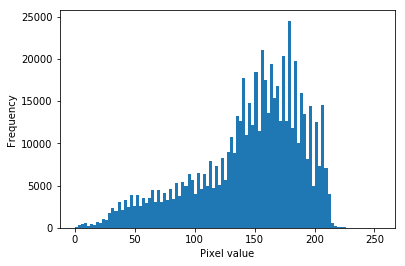

In [8]:
# let's focus on our gray image
# the hist() plotting function expects a 1D array, so we have to "flatten" the 2D array into 1D
grey_oned = grey_img.flatten()
# We plot the color histogram.
plt.hist(grey_oned, bins=100)
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.show()

So... what can we understand from the histogram; first off, we see that the greatest number of pixels are considered "bright" since they are located on the right side of the plot. Then; we also note that the range of the bright pixels is way smaller compared to the one of the dark pixels. Regarding a grayscale image; this is all the information we're able to obtain, but for a colored image we could get the global color histogram (sum of RGB) and an individual histogram for each of the channels.

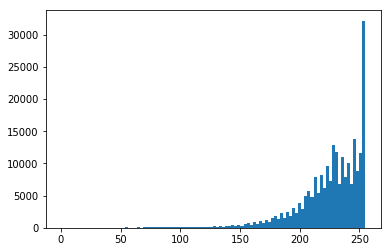

In [9]:
# We parse through the channels using the third index.
# They are in the order red (0) blue (1) and green (2)
red_channel = color_img[:,:,0]
green_channel = color_img[:,:,1]
blue_channel = color_img[:,:,2]

# Show a histogram of the red channel.
red_values = red_channel.flatten() 
plt.hist(red_values, bins=100)
plt.show()

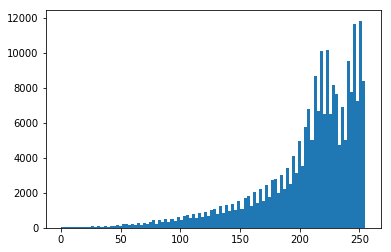

In [10]:
# Exercise: Can you make a histogram of the green values? 
green_values = green_channel.flatten()
plt.hist(green_values, bins=100)
plt.show()

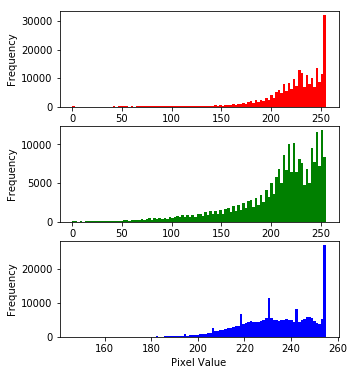

In [11]:
# Let's plot all 3 together for comparison.
red_values = red_channel.flatten() 
green_values = green_channel.flatten() 
blue_values = blue_channel.flatten() 

plt.figure(figsize=(5,6))
plt.subplot(3, 1, 1) # 3 rows, 1 column, first plot
plt.hist(red_values, bins=100, color='red')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2) # 3 rows, 1 column, second plot
plt.hist(green_values, bins=100, color='green')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3) # 3 rows, 1 column, third plot
plt.hist(blue_values, bins=100, color='blue')
plt.ylabel('Frequency')
plt.xlabel('Pixel Value')

plt.show()

# By comparing the histograms we can learn about the colors in the image. 
# For example we can see that there is less green in the image than red and

These histograms can also tell us about the distribution of certain features; for example, maybe there is a dark feature that can't be seen in the blue histogram but maybe it can be seen in the red histogram. Since we see that the values of the pixels tend to values above 100 we can expect a very bright image (which we happen to see since this is the Onion picture).

### Image filtering (thresholds)
Now that we have a color histogram; we will try to filter out some sections of the image based solely on the intensity of the pixels. We will use the bird image as an example; maybe it has too many bright sections as the background, so we should be able to filter out some of that using conditional statements. This is a very simple filtering technique but it can help to eliminate some of the background noise.

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


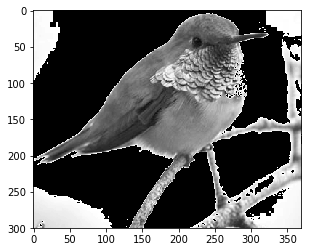

In [12]:
# First, find the pixels with low values.
# We can see from the histogram of the grey image above that 190 is an ok threshold
low_values = grey_img < 190
# Take a look at this array - it's a 2D array that is True where the values are < 190 and False elsewhere
print(low_values[200:500,280:650])

# If we multiply the grey pixel values by the True/False above, it is like multiplying by 1 (True) and 0 (False)
filt_img = grey_img*(grey_img < 190)
# Lets take a look
plt.imshow(filt_img[200:500,280:650], cmap='gray')
plt.show()

Now... this filter might not seem too robust; but we have to remember that we are only using one channel and only one condition. Therefore; if we want to obtain a good result we will have to include either more conditional statements or include more channels (RGB). Before going into too much detail; we'll start by doing some exercises to get comfortable when dealing with images.

### Exercise!

1. Create a function that parses through an image (takes an RGB image as an input) and performs the following operation. Extract the red, green and blue channels into their own respective lists and plot all 4 images in the same figure (Red image, blue image, green image and normal image). 

2. Once that we have the numerical arrays; build a function that returns a histogram containing the frequency of the values of each channel.

    2.1 Load the image and split it into its 3 channels.
    
    2.2 You can either find a way to count the frequency of the values, or you can reshape the array such that a histogram can be done directly.
    
    2.3 Plot the resulting frequencies vs their corresponding values.
 
    2.4 Interpret the results, what can we learn about the image given this histogram?

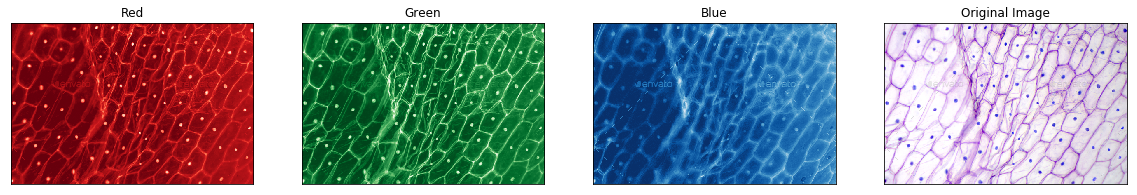

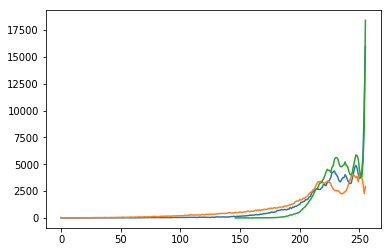

In [13]:

# Image Parser
def optimparse(img):
    f, ax = plt.subplots(1, 4, figsize=(20,20))
    T = ["Red","Green","Blue","Original Image"]
    cmaps = ["Reds", "Greens", "Blues", None]
    for i in range(0,4):
        if i<3:
            ax[i].imshow(img[:,:,i], cmap=cmaps[i])
        else:
            ax[i].imshow(img)
        ax[i].title.set_text(T[i])
        ax[i].set_xticks([]), ax[i].set_yticks([]),
    
    plt.show()
optimparse(color_img)

# Color histogram
def colhist(img):
    #Decompose the image into channels
    #Generate our bins
    bins = np.linspace(0, 255, 150)
    #Find the count of unique values and plot the lines over each other.
    x,y = np.unique(img[:,:,0], return_counts=True)
    plt.plot(x,y)
    x,y = np.unique(img[:,:,1], return_counts=True)
    plt.plot(x,y)
    x,y = np.unique(img[:,:,2], return_counts=True)
    plt.plot(x,y)
    plt.show()
colhist(color_img)

So how do we interpret a color histogram? We do see that the image is dominated by high cell values given the peaks located on the far right but what does that represent? It refers to the "lightness" and "darkness" of an image; a concentration of the values on the right will represent an image that is predominantly white (lighter) while the left side corresponds to darker features. As such; if we wanted to filter out light or dark features a color histogram would be a good way to approximate our given threshold.

## Problem 3
3.1 We have a folder named Bact which contains the images depicting the growth of an E. Coli colony of bacteria. Without creating a new file or moving the current notebook; find a way to generate a list that contains the name of every image in the Bact folder. Hint: You can peek into the folder and read the names. (Solutions where you create a list by typing every name by hand wont be accepted).

3.2 Load 5 of the given images onto Python; explore its structure and obtain the color histogram. Remember that Python loads images in the BGR format so you might have to do a conversion in order to simplify things.

3.3 Find a way to quantify the growth of bacteria across the images. (Every image is taken at a set time interval (10 minutes)).

3.4 Graph the size of the colony as a function of time using the matplotlib package.

In [14]:
# Generate a code that stores the name of the files in a list. There are 36 images.
filename_list = [] 

for i in range(37):
    if i < 10:
        # If the number is < 10 then we should put a 0 at the beginning.
        filename_list.append('colony_growth_' + '0' + str(i) + '.tif')        
    else:
        # Otherwise, we don't need the 0.
        filename_list.append('colony_growth_' + str(i) + '.tif')
print(filename_list)

['colony_growth_00.tif', 'colony_growth_01.tif', 'colony_growth_02.tif', 'colony_growth_03.tif', 'colony_growth_04.tif', 'colony_growth_05.tif', 'colony_growth_06.tif', 'colony_growth_07.tif', 'colony_growth_08.tif', 'colony_growth_09.tif', 'colony_growth_10.tif', 'colony_growth_11.tif', 'colony_growth_12.tif', 'colony_growth_13.tif', 'colony_growth_14.tif', 'colony_growth_15.tif', 'colony_growth_16.tif', 'colony_growth_17.tif', 'colony_growth_18.tif', 'colony_growth_19.tif', 'colony_growth_20.tif', 'colony_growth_21.tif', 'colony_growth_22.tif', 'colony_growth_23.tif', 'colony_growth_24.tif', 'colony_growth_25.tif', 'colony_growth_26.tif', 'colony_growth_27.tif', 'colony_growth_28.tif', 'colony_growth_29.tif', 'colony_growth_30.tif', 'colony_growth_31.tif', 'colony_growth_32.tif', 'colony_growth_33.tif', 'colony_growth_34.tif', 'colony_growth_35.tif', 'colony_growth_36.tif']


In [15]:
# Alternatively, we can just ask for all the filenames in appropriate directory "Bact/"
# This way we don't need to know how many images there are.
import os

filename_list = os.listdir('Bact/')
print(filename_list)

['colony_growth_00.tif', 'colony_growth_01.tif', 'colony_growth_02.tif', 'colony_growth_03.tif', 'colony_growth_04.tif', 'colony_growth_05.tif', 'colony_growth_06.tif', 'colony_growth_07.tif', 'colony_growth_08.tif', 'colony_growth_09.tif', 'colony_growth_10.tif', 'colony_growth_11.tif', 'colony_growth_12.tif', 'colony_growth_13.tif', 'colony_growth_14.tif', 'colony_growth_15.tif', 'colony_growth_16.tif', 'colony_growth_17.tif', 'colony_growth_18.tif', 'colony_growth_19.tif', 'colony_growth_20.tif', 'colony_growth_21.tif', 'colony_growth_22.tif', 'colony_growth_23.tif', 'colony_growth_24.tif', 'colony_growth_25.tif', 'colony_growth_26.tif', 'colony_growth_27.tif', 'colony_growth_28.tif', 'colony_growth_29.tif', 'colony_growth_30.tif', 'colony_growth_31.tif', 'colony_growth_32.tif', 'colony_growth_33.tif', 'colony_growth_34.tif', 'colony_growth_35.tif', 'colony_growth_36.tif']


By viewing the images we notice that as time progresses the amount of bacteria tends to increase; this will be reflected in the image as a increase in brightness overall since the background is dark. Therefore; if we want to filter the bacteria we need to calculate a threshold after which the overall darkness is gone. This can be accomplished via a color histogram.

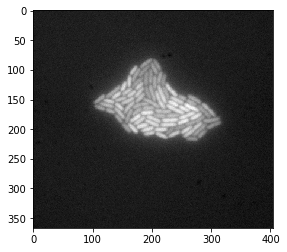

In [16]:
# Let's look at a picture of bacteria!
# Let's read a single image - in this case the last one in the list above. 
imu = plt.imread("Bact/" + filename_list[-1])

# Then we show it!
plt.imshow(imu,cmap='gray')
plt.show()

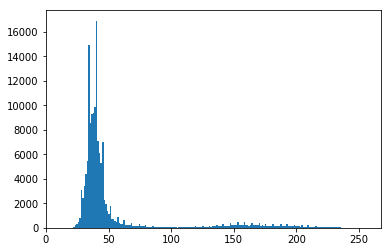

The first peak corresponds to a dark background, so we need to filter out after that one. 100 seems good.


In [17]:
# Now we plot a histogram of the values. We need to convert the 2D image into a 1D array for this
# since the hist() function doesn't know how deal with a 2d array. 
img_1d = imu.flatten()

# We can just plot a histogram to see which values are common. There are 255 distinct values, so 
# setting bins to 200 means there is about 1 value per bin. 
plt.hist(img_1d, bins=200)

# Looks like the background is less than 50, so if we set a threshold at 100 we will ignore the background.
plt.show()
print("The first peak corresponds to a dark background, so we need to filter out after that one. 100 seems good.")

In [18]:
# We can quantify the growth by looking at the number of bright pixels.
# Initially all the values are 0, but we will change then in a loop below
bright_pixels = np.zeros(len(filename_list))

# Enumerate gives us both the index and the value in our list of filenames. Cool, right!
for i, filename in enumerate(filename_list):
    imu = plt.imread('Bact/' + filename)
    filtered = imu > 100
    
    # we use the np.sum() function to count the number of pixels that have values above 100.
    bright_pixels[i] = np.sum(filtered)
print(bright_pixels)

[ 1198.   847.   866.   767.   887.  1423.  1292.  1746.  1332.  1268.
  1379.  1478.  1574.  1784.  1999.  2059.  2246.  2382.  2656.  2871.
  3147.  3452.  3817.  4238.  4712.  5408.  5934.  6527.  7257.  8093.
  8938.  9878. 10933. 11921. 13057. 14586. 16015.]


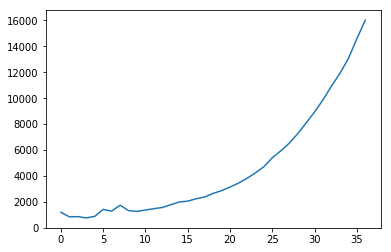

In [19]:
# Now the easy part, plotting the result.
plt.plot(bright_pixels)
plt.show()

This previous example is useful since it shows us how easily we can filter an image via the use of a channel; however, in this example we only used an image with one channel which made the filtering process easy. As we have said before; this will not be the case most of the time.

## Cell Colonies growth characterization. (Exercise)
On your image folder you'll find an image named Colonies; if you open it you'll se an image taken of 6 petri dishes with different amounts of cells on them. Your activity will consist on using what you've learned before to find a way to quantify the amount of cell growth in each petri dish; at the end of the exercise you should return a list containing the measured cell growth in each petri dish.

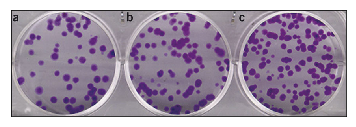

(555, 850, 3)


In [20]:
plate_img = plt.imread('img/Colonies.jpg', format='.jpg')
plt.xticks([])
plt.yticks([]) 
plt.imshow(plate_img[0:270,:,:])
plt.show()
print(np.shape(plate_img))

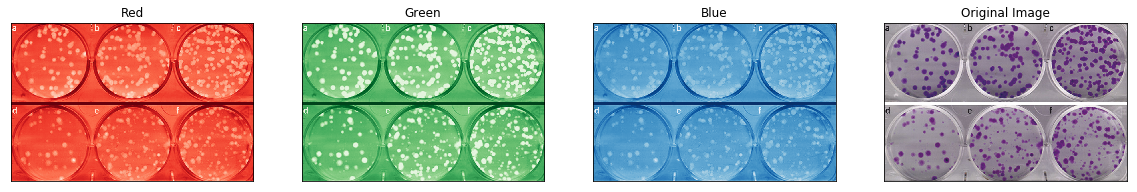

In [21]:
#We use our function to see which channel is the most useful.
optimparse(plate_img)

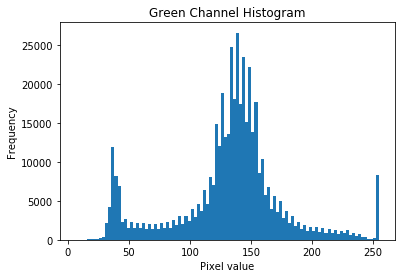

In [22]:
# Green is clearly the most useful - the colonies have much lower green than the rest of the image! 
# Let's plot a histogram of the green channel.
green_channel = plate_img[:,:,1]
# And flatten to 1D. 
green_values = green_channel.flatten()

# Now we plot the histogram
plt.hist(green_values, bins=100)
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.title('Green Channel Histogram')

plt.show()

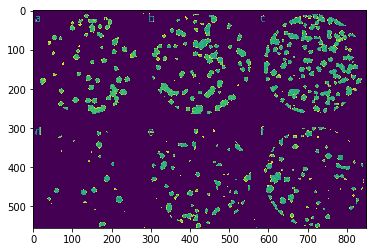

In [23]:
# We saw from the individual channels that we want the regions of low green intensity. 
# From the histogram we see that the first peak is around 50 - so 60 is a good upper threshold. 
# However; if we want a more precise measurement; we might want to filter out the letters using the blue channel.

# First step - keep only the green values that are < 60
filtered_image = green_channel*(green_channel < 60)
plt.imshow(filtered_image)
plt.show()

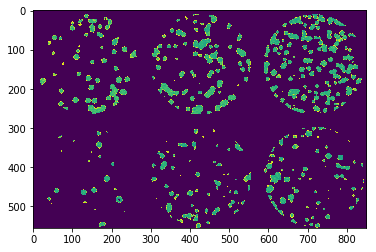

In [24]:
# We notice that the letters are still there. If we look again we can see that the letters have low blue values.
blue_channel = plate_img[:,:,2]
filtered_image2 = filtered_image*(blue_channel>70)

# Now this looks great: really on the colonies. 
plt.imshow(filtered_image2)
plt.show()

So we have the colonies only, how can we quantify the growth in each plate? One option is to divide the plates up into individual plates, estimate the area of the circular petri dish (in pixels), calculate the area of the dish by adding all the pixels and divide the number of shining pixels by the total area.

In [25]:
gpf = filtered_image2
# We make a list where each element is a picture of a single petri dish
im = [gpf[10:270,:280],
      gpf[10:270,280:570],
      gpf[10:270,570:],
      gpf[290:,:280],
      gpf[290:,280:570],
      gpf[290:,570:]]

# Estimated circle area by eye.
# Sucks that we had to do this manually - maybe you could automate it?!
petrie_plate_area = 125*125*np.pi
fractional_colony_area = []

# Since we filtered, there are cells everywhere the image has > 0 value.
# Add the non 0 area of the dish and divide by the area of the circle.
for petrie_plate in im:
    fraction = np.sum(petrie_plate > 0)/petrie_plate_area
    fractional_colony_area.append(fraction)
print(fractional_colony_area)

[0.14952925213369753, 0.2155543619654841, 0.3092647924579921, 0.037647146858729295, 0.10931525435278214, 0.13323178596108742]
